In [1]:
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline
import sys
sys.path.append("/Linux/scikit-rf/")
import skrf as rf # scikit-rf : object-oriented approach to microwave engineering

Populating the interactive namespace from numpy and matplotlib


In [5]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 8  # increase the default image size 

Importing home-made classes.

In [3]:
%cd ../icrh/antenna/

/home/hash/Documents/ICRH/icrh/antenna


In [5]:
from resonant_loop import ResonantLoop, ResonantDoubleLoop
from topica import TopicaResult

# Importing the full-wave solutions

We import the three devices of our electric circuit: the bridge, the impedance transformer and the window. As the default frequency range defined in skrf is the GHz, we set the frequency unit to MHz (this is only in order to have nicer plot after).  

In [6]:
bridge = rf.io.hfss_touchstone_2_network('../data/Sparameters/WEST/WEST_ICRH_bridge.s3p', f_unit='MHz')
impedance_transformer = rf.io.hfss_touchstone_2_network('../data/Sparameters/WEST/WEST_ICRH_impedance-transformer.s2p', f_unit='MHz')
window = rf.io.hfss_touchstone_2_network('../data/Sparameters/WEST/WEST_ICRH_window.s2p', f_unit='MHz')

# TOPICA Matrix

Here we connect a TOPICA coupling matrix to two resonant loops. Pay attention to the way TOPICA indexes the straps. 
$$\begin{matrix}
2 & | & 1 \\
4 & | & 3
\end{matrix}$$
cf figure below
<img src="./figures/network.png"/>

###Parameters

In [15]:
f_match = 55e6 # matching frequency
Z_match = [30+1j*0, 30+1j*0] # matching impedance 
a_in = [1, -1] # input power waves
plasma_profile_nb = 1 # 1 to 8

filename = '../data/TOPICA/Tore Supra_WEST/L-mode/TSproto12/Zs_TSproto12_'\
                +str(int(f_match/1e6))+'MHz_Profile'+str(int(plasma_profile_nb))+'.txt'

In [16]:
# Characteristic Impedance depends of the prototype number.
# TSproto10: 13.7 Ohm
# TSproto12: 46.7 Ohm
plasma_TOPICA = TopicaResult(filename, z0=46.7).to_skrf_network(bridge.frequency)

RL1 = ResonantLoop(bridge, impedance_transformer, window)
RL2 = ResonantLoop(bridge, impedance_transformer, window) 
# take care that RL objects passed to the constructor are not the same one ! (otherwise the capactors would be the same!)
RDL = ResonantDoubleLoop(RL1, RL2, plasma_TOPICA) 

sol_TOPICA = RDL.match(a_in, f_match, Z_match)

(False, array([  17.29120427,   97.54021833,  101.38559849,   81.67464036]))
(False, array([ -194.56967903,    39.45410888,    51.70818201,  1079.53904391]))
Bad solution found (out of range capacitor) ! Re-doing...
Bad solution found (out of range capacitor) ! Re-doing...
(False, array([ 112.28130603,   93.53393269,   71.43484393,  101.97436879]))
(False, array([  65.69016177,   14.08772945,  102.73646686,   81.28501901]))
(False, array([ 69.83531248,  88.96562292,  28.60660723,  97.63653785]))
(False, array([  66.37971155,  194.4768733 ,  134.4178121 ,   77.97618228]))
(False, array([ 214.16752505,   64.3558971 ,  434.16422942,   55.67351976]))
Bad solution found (out of range capacitor) ! Re-doing...
Bad solution found (out of range capacitor) ! Re-doing...
(False, array([  87.55332867,   19.23719131,   71.73032001,  108.42257717]))
(False, array([ 740.15995898,   53.00604638,  295.99654948,   59.20145784]))
Bad solution found (out of range capacitor) ! Re-doing...
Bad solution foun

KeyboardInterrupt: 

For the same set of capacitor values found, we vary the plasma loads (from plasma reference indexes 1 to 8) and plot scattering parameters and VSWR

NameError: name 'TOPICA_2_network' is not defined

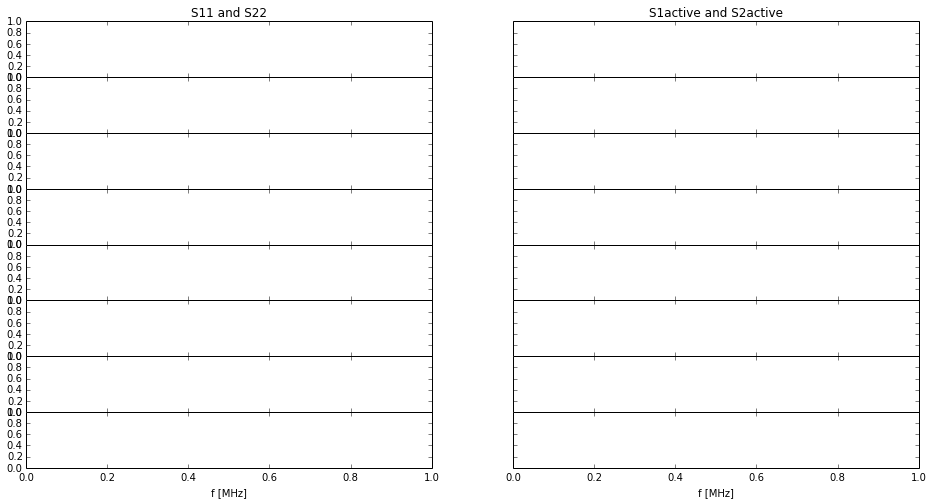

In [16]:
# 8x2=16 subplots : left column are Sii and right are active Si
f, axarr = plt.subplots(8, 2, sharex=True, sharey=True)
# make subplots clSose to each other and hide x ticks for all but bottom plots.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-2]], visible=False)
# titles and axes labels
axarr[0,0].set_title('S11 and S22')
axarr[0,1].set_title('S1active and S2active')
axarr[7,0].set_xlabel('f [MHz]')
axarr[7,1].set_xlabel('f [MHz]')
# let's go Marco !
for id in xrange(8):
    RDL.plasma = TOPICA_2_network('WEST_ICRH/TOPICA/TSproto12_'+str(int(f_match/1e6))+'MHz/Zs_TSproto12_Profile'+str(id+1)+'.txt')
    # S11 and S22
    axarr[id, 0].plot(RDL.get_f()/1e6, RDL.get_network().s_db[:,0,0], lw=2)
    axarr[id, 0].plot(RDL.get_f()/1e6, RDL.get_network().s_db[:,1,1], lw=2)
    axarr[id, 0].grid(True)
    axarr[id, 0].set_ylabel('[dB]' )
    
    # Sactive1 and Sactive2
    Sact = RDL.get_s_active(a_in)
    axarr[id, 1].plot(RDL.get_f()/1e6, 20*np.log10(np.abs(Sact[:,0])), lw=2)
    axarr[id, 1].plot(RDL.get_f()/1e6, 20*np.log10(np.abs(Sact[:,1])), lw=2)
    axarr[id, 1].grid(True)
    

In [15]:
for id in xrange(1, 9):    
    RDL.plasma = TOPICA_2_network('WEST_ICRH/TOPICA/TSproto12_'+str(int(f_match/1e6))+'MHz/Zs_TSproto12_Profile'+str(id)+'.txt')
    VSWR_active = RDL.get_vswr_active(a_in)

    subplot(1,2,1)
    plot(RDL.get_f()/1e6, VSWR_active[:,0] , lw=2)
    axis([40,60,1,6])
    grid('on')
    title('"Active" VSWR Port 1')
    
    subplot(1,2,2)
    plot(RDL.get_f()/1e6, VSWR_active[:,1] , lw=2)    
    axis([40,60,1,6])
    grid('on')
    title('"Active" VSWR Port 2')



NameError: name 'TOPICA_2_network' is not defined

# Sweep over plasma profiles

At a given frequency, we sweep over the eight plasma profiles. For each plasma profile, we seek for the match point and store the match points found. The match points vs the plasma profile are then plot.  

In [10]:
f_match = 48e6 # matching frequency
Z_match = [30+1j*0, 30+1j*0] # matching impedance 
a_in = [1, -1] # input power waves

In [12]:
RL1 = ResonantLoop(bridge, impedance_transformer, window)
RL2 = ResonantLoop(bridge, impedance_transformer, window) 
C_vs_plasma_profile = np.zeros((8,4)) # 8 profiles, 4 capacitor values

for id_profile in xrange(1, 9):
    filename = 'WEST_ICRH/TOPICA/TSproto12_'+str(int(f_match/1e6))+'MHz/Zs_TSproto12_Profile'+str(id_profile)+'.txt'
    print('========== '+filename)
    plasma_TOPICA = TopicaResult(filename, z0=46.7).to_skrf_network(bridge.frequency)
    RDL = ResonantDoubleLoop(RL1, RL2, plasma_TOPICA) 

    sol_TOPICA = RDL.match(a_in, f_match, Z_match)
    C_vs_plasma_profile[id_profile-1, :] = sol_TOPICA.x
    

========== WEST_ICRH/TOPICA/TSproto12_48MHz/Zs_TSproto12_Profile1.txt
False [    80.75406355     91.83345529 -58626.38545377     82.17617346]
Bad solution found (out of range capacitor) ! Re-doing...
False [  8.19355957e+01  -1.55036804e+06   9.16895681e+01   8.06773030e+01]
Bad solution found (out of range capacitor) ! Re-doing...
False [ -1.11767962e+03   8.14502011e+01   8.17101978e+01  -2.03562847e+06]
Bad solution found (out of range capacitor) ! Re-doing...
Bad solution found (out of range capacitor) ! Re-doing...
False [ 110.38614393  103.44351478   22.99779909   17.97470142]
False [  8.07507242e+01   9.18479799e+01  -1.09273580e+06   8.18596903e+01]
Bad solution found (out of range capacitor) ! Re-doing...
False [  3.08878698e+24   8.14350641e+01   8.25803242e+01   6.67025479e+21]
Bad solution found (out of range capacitor) ! Re-doing...
Bad solution found (out of range capacitor) ! Re-doing...
False [ 56.51083084  18.37960583  32.23829289  19.74599585]
False [   81.89716945 -5

C:\Users\JH218595\Documents\WinPython-64bit-2.7.6.2\python-2.7.6.amd64\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\JH218595\Documents\WinPython-64bit-2.7.6.2\python-2.7.6.amd64\lib\site-packages\scipy\optimize\minpack.py:236: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


 [  8.28148656e+01   8.75202887e+02  -8.26709600e+06   8.28126050e+01]
Bad solution found (out of range capacitor) ! Re-doing...
Bad solution found (out of range capacitor) ! Re-doing...
False [ 4062.60747005    81.93773322    96.99046519    81.27015029]
Bad solution found (out of range capacitor) ! Re-doing...
False [  32.24470656   42.65973944   56.10308249  111.13859984]
False [ -7.63839368e+07   8.21371781e+01   1.59869156e+02   8.25290250e+01]
Bad solution found (out of range capacitor) ! Re-doing...
True [ 95.32288692  81.14103912  81.24923777  93.61594787]
[ 95.32288692  81.14103912  81.24923777  93.61594787]
========== WEST_ICRH/TOPICA/TSproto12_48MHz/Zs_TSproto12_Profile6.txt
True [ 96.89325744  81.40925135  81.29284628  94.1664175 ]
[ 96.89325744  81.40925135  81.29284628  94.1664175 ]
========== WEST_ICRH/TOPICA/TSproto12_48MHz/Zs_TSproto12_Profile7.txt
False [ -6.12307260e+05   8.25932367e+01   1.62386254e+02   8.31767113e+01]
Bad solution found (out of range capacitor) ! R

In [13]:
C_vs_plasma_profile/1e-12

array([[ 92.22588845,  80.39008184,  80.67056269,  91.79646113],
       [ 80.91669875,  92.47155266,  92.26921634,  80.89631097],
       [ 81.11245257,  93.07188182,  92.75286088,  81.05548136],
       [ 95.7043134 ,  80.17673439,  95.73987778,  80.38641   ],
       [ 95.32288692,  81.14103912,  81.24923777,  93.61594787],
       [ 96.89325744,  81.40925135,  81.29284628,  94.1664175 ],
       [ 97.28546564,  81.74439645,  81.3760221 ,  94.30405365],
       [ 98.37055884,  82.05152604,  81.48405829,  94.46938967]])

[0.2, 8.8, 20, 100]

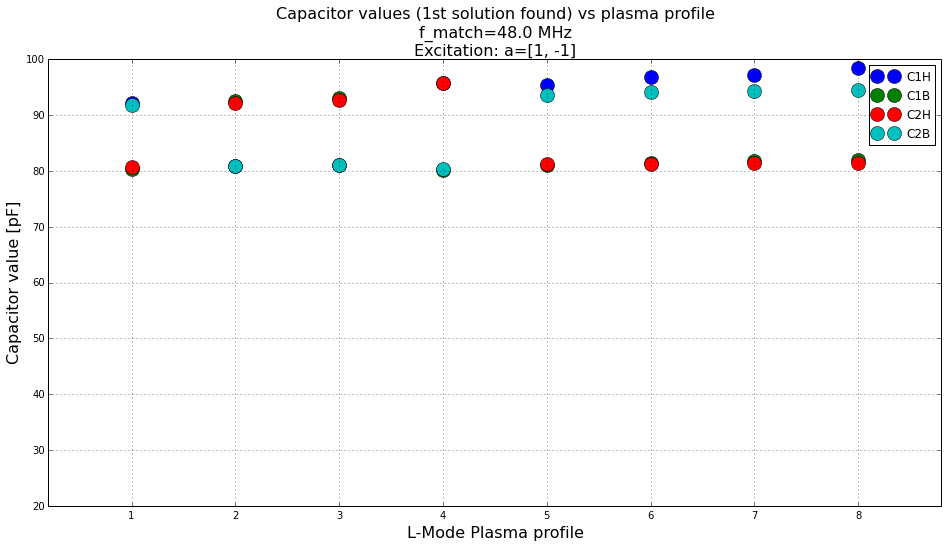

In [14]:
plot(xrange(1,9), C_vs_plasma_profile/1e-12, 'o', markersize=14 )
grid()
title('Capacitor values (1st solution found) vs plasma profile \n' 
      'f_match='+str(f_match/1e6)+' MHz \n'
      'Excitation: a='+str(a_in),  fontsize=16 )
xlabel('L-Mode Plasma profile',  fontsize=16)
ylabel('Capacitor value [pF]',  fontsize=16)
legend(('C1H', 'C1B' , 'C2H', 'C2B'), loc='best')
axis([0.2, 8.8, 20, 100])

# Currents and Voltages at capacitors

In this section we explore the currents and voltages at the capacitors for a prescribed input. 